# Discovery

Discovery differents plots

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/Plotly-interactive-reports


## RUN

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import json
import pickle
from sklearn.pipeline import Pipeline
import sys
import os
import warnings
import gcsfs


warnings.filterwarnings("ignore")

from sklearn.base import BaseEstimator, TransformerMixin

# classic visalization
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

### 0. Read Data
Read the data generated in the previous steps cleaning the data

In [3]:
path_raw_data_processed = 'data/data.pkl'
data_full_report = pd.read_pickle(path_raw_data_processed)
data_full_report.head(3)

^GSPC          ^NDX          ^DJI        NVDA        AAPL  \
2023-08-28  4433.310059  15052.459961  34559.980469  468.350006  180.190002   
2023-08-29  4497.629883  15376.549805  34852.671875  487.839996  184.119995   
2023-08-30  4514.870117  15462.429688  34890.238281  492.640015  187.649994   

                  TSLA  
2023-08-28  238.820007  
2023-08-29  257.179993  
2023-08-30  256.899994

### 0. Read master table and replace names with names used to plot
Read master table, get column "name_to_show" and replace the columns of the data with the names that will be used to plot

In [4]:
# read table config features to show
path_config_feature_show = 'data/config_show_report.xlsx'
master_table_tags_show = pd.read_excel(path_config_feature_show)
master_table_tags_show = master_table_tags_show[master_table_tags_show.columns[1:]]
master_table_tags_show.head(10)

stock name_to_show show_report
0  ^GSPC       s&p500         Yes
1   ^NDX    nazdaq100         Yes
2   ^DJI    downjones         Yes
3   NVDA       nvidia          No
4   AAPL        apple          No
5   TSLA        tesla          No

In [5]:
# get list of names of feature in the data and the list of names to change to feature and show its name in the plots
list_tags = master_table_tags_show['stock'].tolist()
list_name_to_show = master_table_tags_show['name_to_show'].tolist()

In [6]:
# sort data accoring master table
data_full_report = data_full_report[list_tags]

# rename columns
data_full_report.columns = list_name_to_show

In [7]:
data_full_report.head()

s&p500     nazdaq100     downjones      nvidia       apple  \
2023-08-28  4433.310059  15052.459961  34559.980469  468.350006  180.190002   
2023-08-29  4497.629883  15376.549805  34852.671875  487.839996  184.119995   
2023-08-30  4514.870117  15462.429688  34890.238281  492.640015  187.649994   
2023-08-31  4507.660156  15501.070312  34721.910156  493.549988  187.869995   
2023-09-01  4515.770020  15490.860352  34837.710938  485.089996  189.460007   

                 tesla  
2023-08-28  238.820007  
2023-08-29  257.179993  
2023-08-30  256.899994  
2023-08-31  258.079987  
2023-09-01  245.009995

### 3. Hist

<Figure size 1200x800 with 0 Axes>

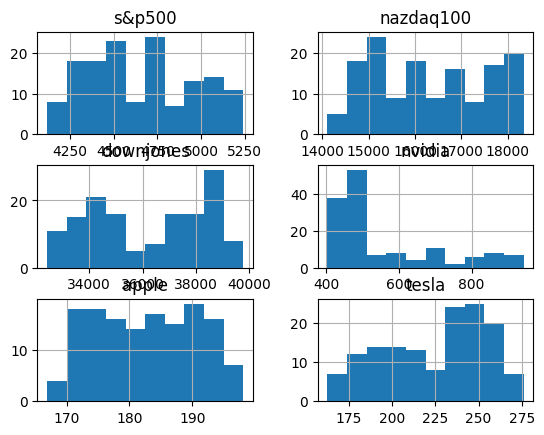

In [8]:
plt.figure(figsize=(12, 8))
data_full_report.hist()
plt.show()

### Rename vars

In [9]:
df = data_full_report.copy()

# PLOT DIFFERENTS KINDS OF TRENDS

### 1. Plot trend one feature

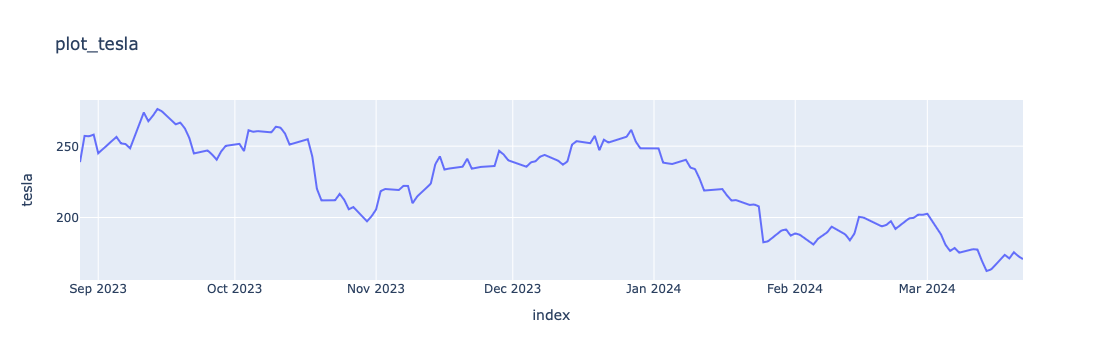

In [10]:
feature_plot = 'tesla'
fig = px.line(df, x = df.index, y = feature_plot, title = f'plot_{feature_plot}')
fig

### 2. Plot all feature into only one figure - multiple axis

In [11]:
# create figure
fig = go.Figure()

# plot each trend
for index, feature in enumerate(df.columns.tolist()):
    fig.add_trace(go.Scatter(
        x = df.index,
        y = df[feature],
        name = f"trend {feature}",
        yaxis = f"y{index+1}"
    ))


# generate axis_configuracion dictionary
axis_configurations = {
    "yaxis1": dict(title="yaxis1 title")
}
for index, feature in enumerate(df.columns.tolist()[1:]):  # since second feature because first feature yaxis already has defined
    axis_configurations[f"yaxis{index+2}"] = dict(title = f"yaxis {feature}", anchor="free", overlaying="y", autoshift=True, title_standoff=0)


# update loyout according axis_configuration dictionary
for axis_name, config in axis_configurations.items():
    fig.update_layout(**{axis_name: config})

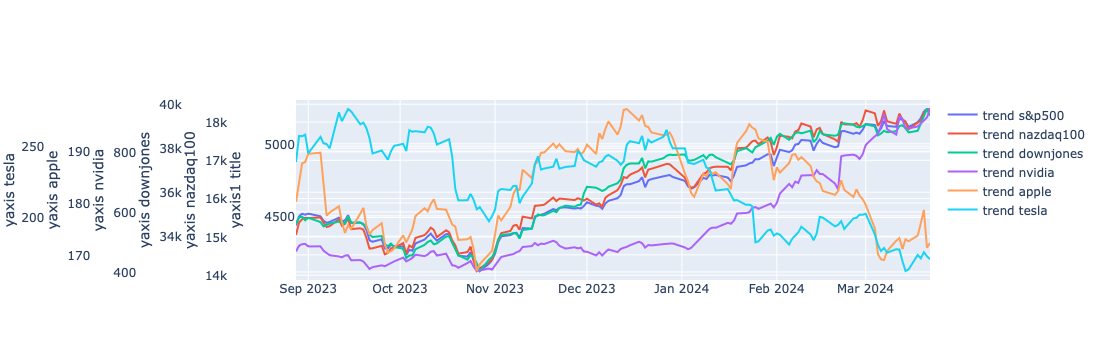

In [12]:
fig

### 3. Subplots where in each subplot there is the trend of one feature
- Each trend in the subplots has the same color

In [13]:
list_features = data_full_report.columns.tolist()[0:3]

In [14]:
number_columns = 1

# create subplots
fig = make_subplots(rows = 6, 
                    cols = 1,
                   )

# add subplot for each of the features -> feature
for index_feature, feature in enumerate(list_features):
    print('tag plot: ', feature)

    # obtener índices en el subplot (en plotly los índices comienzan en 1, por lo que debe sumarse un 1 a los resultados obtenidos)
    row = (index_feature // number_columns) + 1
    column = (index_feature % number_columns) + 1

# subplot each feature
    # trend 
    aux_plot_trend = go.Scatter(
        x = df.index, 
        y = df[feature],
        name = feature,
        line=dict(color='blue')
        )

    # add fig go
    fig.add_trace(aux_plot_trend, row = row, col = column)

tag plot:  s&p500
tag plot:  nazdaq100
tag plot:  downjones


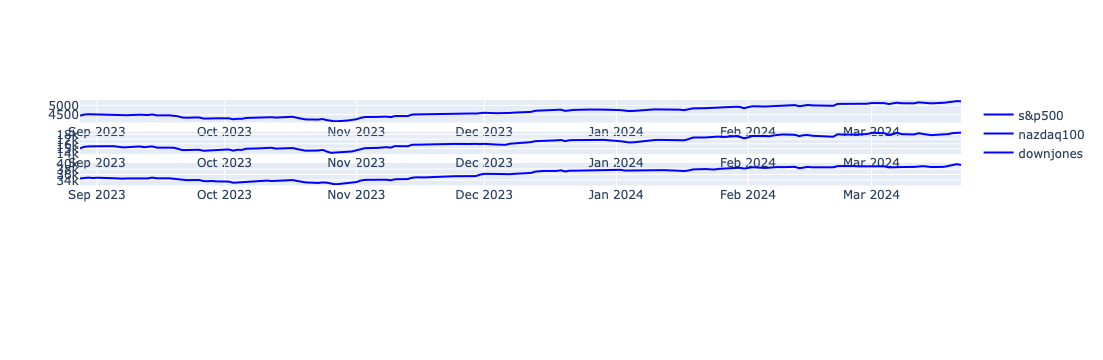

In [15]:
fig

### stop basic plots

### 4. One plot with multiple features
- Plot multiple trend - all the trends has the same axis

In [16]:
list_features_show = data_full_report.columns.tolist()[0:3]
fig = px.line(df, x = df.index, y = list_features_show, title = f'plot: {list_features_show}')

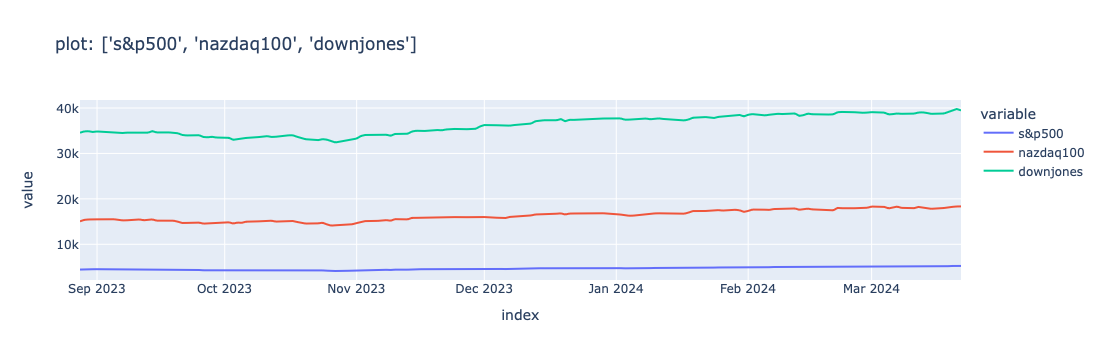

In [17]:
fig

### 4. One plot with multiple features - deactivate secondary features
- Plot always principal feature.
- Secondary features are deactive by default
- All the plots share the same y-axis

#### 4.a Plotly express

In [18]:
# list of features
list_features_principal = data_full_report.columns.tolist()[0:3]

list_features_secondary = data_full_report.columns.tolist()[3:6]

print('Principal features: ', list_features_principal)
print('Secondary features: ', list_features_secondary)

Principal features:  ['s&p500', 'nazdaq100', 'downjones']
Secondary features:  ['nvidia', 'apple', 'tesla']


In [19]:
# Crear un gráfico de líneas para la primera característica
fig = px.line(df, x=df.index, y=list_features_principal[0], title='Multiple Features Plot')

# Añadir las opciones seleccionables para las demás características
for feature_show in list_features_secondary:
    fig.add_scatter(x=df.index, y=df[feature_show], mode='lines', name=feature_show, visible='legendonly')

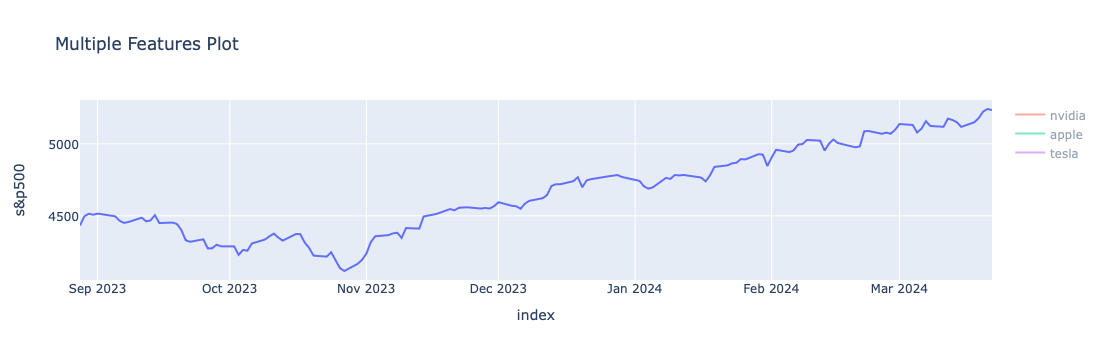

In [20]:
fig

#### 4.b Plotly object

In [21]:
# list of features
list_features_principal = data_full_report.columns.tolist()[0:3]

list_features_secondary = data_full_report.columns.tolist()[3:6]

print('Principal features: ', list_features_principal)
print('Secondary features: ', list_features_secondary)

Principal features:  ['s&p500', 'nazdaq100', 'downjones']
Secondary features:  ['nvidia', 'apple', 'tesla']


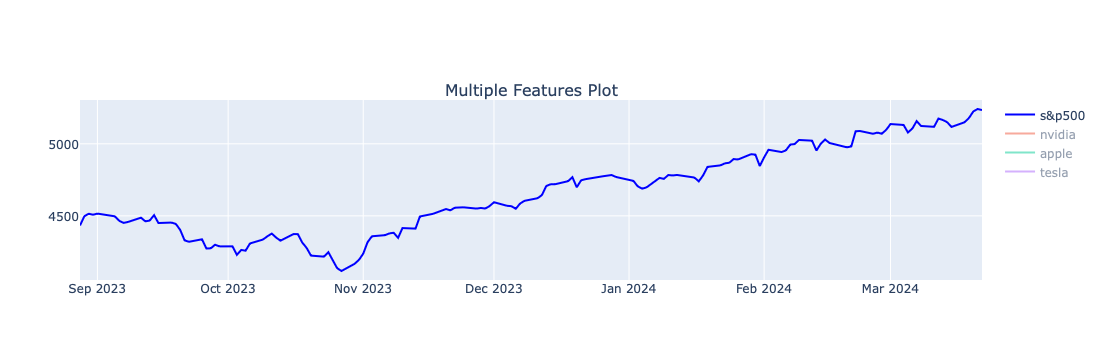

In [22]:
# Crear el gráfico
fig = make_subplots(rows=1, cols=1, subplot_titles=["Multiple Features Plot"])

# Añadir la primera característica al gráfico
fig.add_trace(go.Scatter(x=df.index, y=df[list_features_principal[0]], name=list_features_show[0], line=dict(color='blue')), row=1, col=1)

# Añadir las opciones seleccionables para las demás características
for feature_show in list_features_secondary:
    fig.add_trace(go.Scatter(x=df.index, y=df[feature_show], name=feature_show, visible='legendonly'), row=1, col=1)

# Actualizar diseño del gráfico
fig.update_layout(showlegend=True)

### 5. Give more values y-axis
- More graduation in y-axis
- In this example the number of ticks are generated automatically, but it is increase the maxium number of ticks

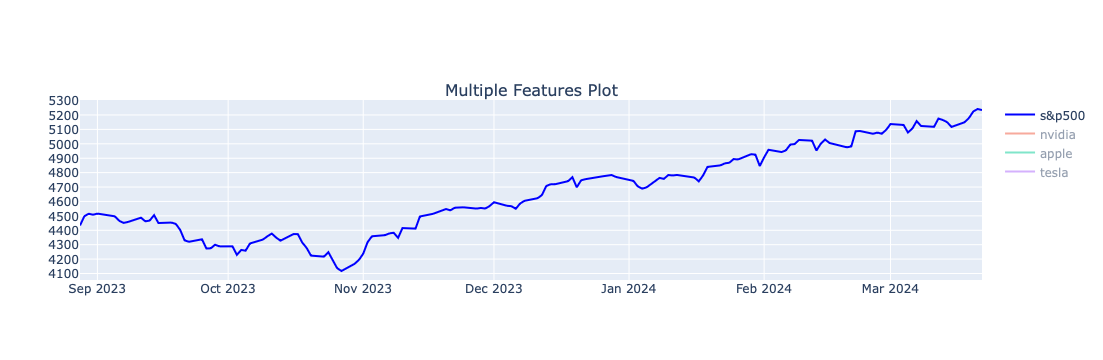

In [23]:
# Crear el gráfico
fig = make_subplots(rows=1, cols=1, subplot_titles=["Multiple Features Plot"])

# Añadir la primera característica al gráfico
fig.add_trace(go.Scatter(x=df.index, y=df[list_features_principal[0]], name=list_features_show[0], line=dict(color='blue')), row=1, col=1)

# Añadir las opciones seleccionables para las demás características
for feature_show in list_features_secondary:
    fig.add_trace(go.Scatter(x=df.index, y=df[feature_show], name=feature_show, visible='legendonly'), row=1, col=1)

######
# Incrementar la graduación del eje y. nticks se utiliza para definir la máxima cantidad de ticks. Lo mostrado puede ser menor o igual a ese parametro
fig.update_yaxes(nticks=15)
######

# Actualizar diseño del gráfico
fig.update_layout(showlegend=True)

### 10. Combine the previous codes to have one to plot a principal feature and secondary features
- All features ploted in one plot
- More graduation in y-axis
- Secondary features deactivated as initial status
- Each plot have its own y-axis scale

In [24]:
# list of features
list_features_principal = data_full_report.columns.tolist()[0:3]

list_features_secondary = data_full_report.columns.tolist()[3:6]

print('Principal features: ', list_features_principal)
print('Secondary features: ', list_features_secondary)

Principal features:  ['s&p500', 'nazdaq100', 'downjones']
Secondary features:  ['nvidia', 'apple', 'tesla']


In [25]:
######### create figure
fig = go.Figure()

######### Add the firts feature to plot - the principal feature to plot
fig.add_trace(go.Scatter(
    x=df.index, 
    y=df[list_features_principal[0]], 
    name=list_features_principal[0], 
    line=dict(color='blue'), 
    yaxis = f"y1" # IMPORTANT THE AXIS NEEDS TO BE NUMERATED AS y1, y2, y3, etc ALWAYS
))

####### Add secondary features deactivate as initial values. Each secondary feature with its own axis
for index, feature_show in enumerate(list_features_secondary):
    fig.add_trace(go.Scatter(
        x=df.index, 
        y=df[feature_show], 
        name=feature_show, 
        yaxis = f"y{index+2}",  # index = 0 None // index = 1 principal feature // index = 2, 3, 4, N secondary feature
        visible='legendonly' # deactive by default
    ))

####### generate axis_configuracion dictionary
# first feature to plot: axis y1
axis_configurations = {
    "yaxis1": dict(title=f"yaxis {list_features_principal[0]}")
}
# for secondary features: axis y2, y3, y4, etc
for index, feature in enumerate(list_features_secondary):
    axis_configurations[f"yaxis{index+2}"] = dict(title = f"yaxis {feature}", anchor="free", overlaying="y", autoshift=True, title_standoff=0, side = 'left')


####### update loyout according axis_configuration dictionary
for axis_name, config in axis_configurations.items():
    fig.update_layout(**{axis_name: config})


####### Increase maximium number of ticks in y-axis
fig = fig.update_yaxes(nticks=15)

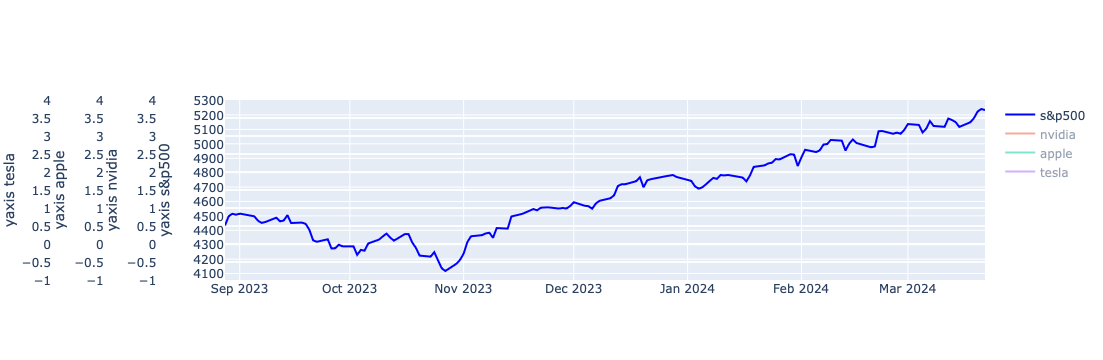

In [26]:
fig

### 11. Subplots - share x axis
Select region in the plot, all the plots change its values

make_subplots(rows=3, cols=1, **shared_xaxes=True**)

In [27]:
# Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Crear subplots con 3 filas y 1 columna
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Agregar las líneas de tendencia a cada subplot
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='Sin(x)'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', name='Cos(x)'), row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines', name='Tan(x)'), row=3, col=1)

# Actualizar las etiquetas de los ejes y los márgenes
fig.update_layout(height=600, width=800, title_text='Subplots con ejes independientes')
fig.update_yaxes(title_text='Sin(x)', row=1, col=1, range=[-1, 1])
fig.update_yaxes(title_text='Cos(x)', row=2, col=1, range=[-1, 1])
fig.update_yaxes(title_text='Tan(x)', row=3, col=1)

# Actualizar los ticks en el eje x para mostrarlos en cada subplot
fig = fig.update_layout(xaxis_showticklabels=True, xaxis2_showticklabels=True, xaxis3_showticklabels = True)

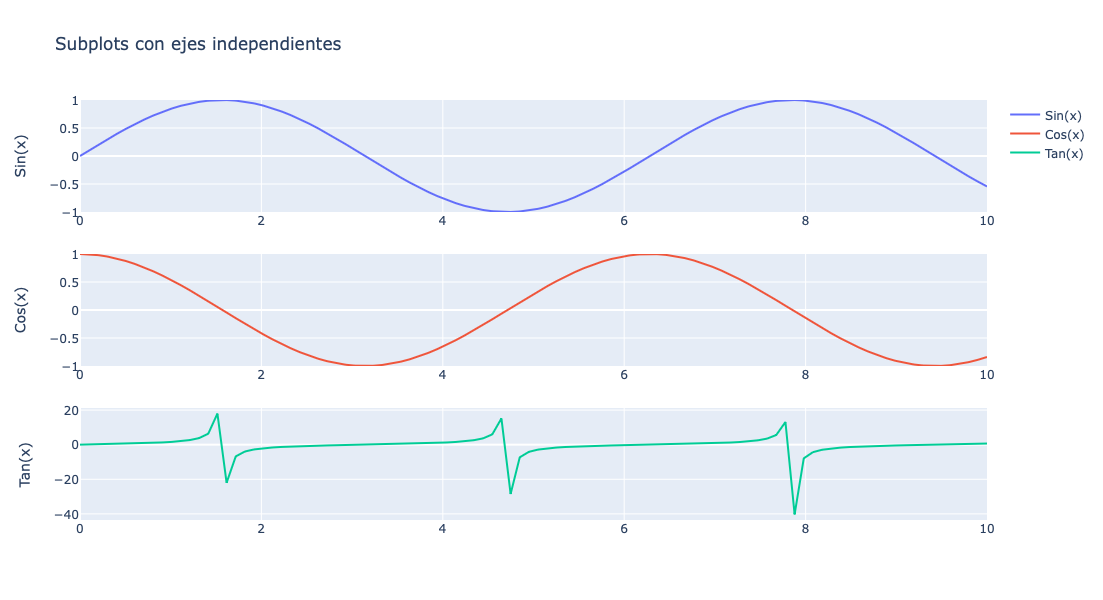

In [28]:
fig

### 12. Add button to control in subplots to control the show of secondary features
When a individual plot is develop, the user can click in the legend to control the secondary features. But when a multiple principal features are showed in subplots, it is difficult select the secondadary features each time. **So using a button it is possible activate or deactivate the secondary features all subplots**

**Content Aditional**:
- buttons to activate or deactivate the show of secondary features in each subplot
- share x axis. So, when a zoom is done in one subplot, it replicates in the rest of subplots
- PRINCIPAL PROBLEM: the secondary features are ploted in a secondary axis. AND IF THE secondary features HAS SCALES SO DIFFENTS, THE plot will be distorted. So, the recomendation is PLOT ONLY ONE SECONDARY FEATURE EACH TIME


**Content of previous plots**
- More graduation in y-axis
- Secondary features deactivated as initial status

DOCUMENTATION ORIGINAL TRICK: https://community.plotly.com/t/can-subplot-support-multiple-y-axes/38891/6?page=2

In [29]:
# list of features
list_features_principal = data_full_report.columns.tolist()[0:3]

list_features_secondary = data_full_report.columns.tolist()[3:6]

print('Principal features: ', list_features_principal)
print('Secondary features: ', list_features_secondary)

Principal features:  ['s&p500', 'nazdaq100', 'downjones']
Secondary features:  ['nvidia', 'apple', 'tesla']


In [30]:
####### Figure with subplots and sharex axis and specs to accept secondary y axis
# calculate number of rows
number_rows = len(list_features_principal)

# figure
fig = make_subplots(rows = number_rows, 
                    cols = 1, 
                    shared_xaxes = True, 
                    subplot_titles = tuple(list_features_principal),
                    specs = [[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}]]
                   )

####### iter across each principal feature and plot it in a subplot and in the same subplot plot all the secondary features
for index_principal, feature_principal in enumerate(list_features_principal, start=1):

    # add trend of the pricipal feature "i" in the row "index_i" 
    aux_plot_trend_feature_principal = go.Scatter(
        x=df.index,
        y=df[feature_principal],
        name=feature_principal,
        line=dict(color='blue') # trends always the same color,
    )
    fig.add_trace(aux_plot_trend_feature_principal, secondary_y=False, row=index_principal, col=1)

    # add trend of the secondary features in EACH PLOT of EACH PRINCIPAL FEATURE
    list_map_color = ["gray", "green", "red"] ## hardocoded map of colors each secondary feature
    for index_secondary, feature_secondary in enumerate(list_features_secondary, start=1):
        aux_plot_trend_secondary_feature = go.Scatter(
            x=df.index,
            y=df[feature_secondary],
            name=feature_secondary,
            line=dict(color = list_map_color[index_secondary-1]),
            visible='legendonly'  # init hidden,
        )
        fig.add_trace(aux_plot_trend_secondary_feature, secondary_y=True , row=index_principal, col=1) # plot in secondary y axis


###### define buttons and actions to change the plot of secondary features
###### NOTE IT IS VERY HARCODED ACCORING THE FEATURES TO PLOT

# Create buttons to control the visibility of the trend of secondary features
# order visibility:  [primary_feature, secondary_feature_1, secondary_feature_2, secondary_feature_3]. 
# In this example: ['primary_feature', 'nvidia', 'apple', 'tesla']
only_trend_button = dict(label="Show only trend", method="update", args=[{"visible": [True, False, False, False]}])
nvidia_button = dict(label="Show nvidia", method="update", args=[{"visible": [True, True, False, False]}])
apple_button = dict(label="Show apple", method="update", args=[{"visible": [True, False, True, False]}])
tesla_button = dict(label="Show tesla", method="update", args=[{"visible": [True, False, False, True]}])
#all_button = dict(label="Show Cloruro y Potasio", method="update", args=[{"visible": [True, True, True, True]}]) # this is not recommended by the PROBLEM OF SECONDATY AXIS, ONLY ONE FEATURE CAN BE PLOTED

# Add the buttons to the legend
fig = fig.update_layout(
    updatemenus=[
        dict(
            buttons=[only_trend_button, nvidia_button, apple_button, tesla_button],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.5, # original y=1.15, 1.3
            yanchor="top"
        ),
    ]
)


###### change general layout
fig = fig.update_layout(
    #height = 550 * number_rows, # largo
    #width = 1850 * number_columns, # ancho
    title_text="Plots of Index and Stocks to Explaint that",
    title_x = 0.5, # centrar titulo
    title_font = dict(size = 28)
)

####### Increase maximium number of ticks in y-axis
fig = fig.update_yaxes(nticks=10)


####### Actualizar los ticks en el eje x para mostrarlos en cada subplot
#fig.update_layout(xaxis1_showticklabels=True, xaxis2_showticklabels=True, xaxis3_showticklabels = True)  # hardcoded

dict_xaxis = {}
for index in range(len(list_features_principal)):
    dict_xaxis[f'xaxis{index+1}_showticklabels'] = True
fig = fig.update_layout(dict_xaxis)

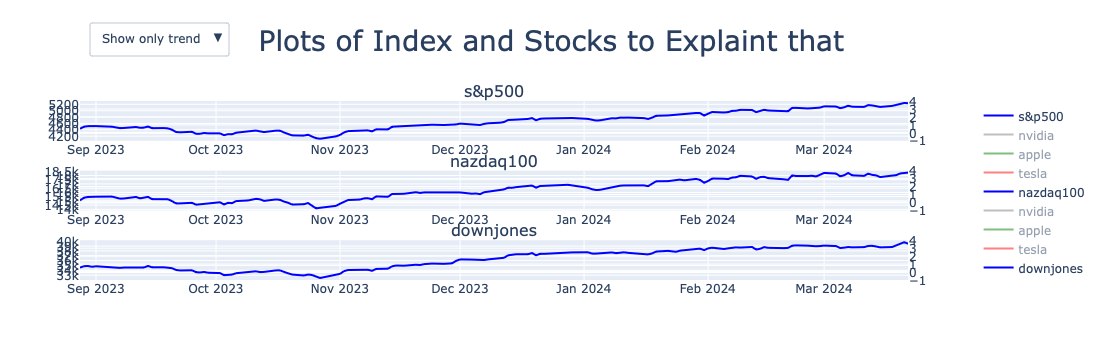

In [31]:
fig

In [32]:
dict_xaxis

{'xaxis1_showticklabels': True,
 'xaxis2_showticklabels': True,
 'xaxis3_showticklabels': True}

### 13. Plot subplots primary features and secondary feature in each subplot. ALSO IT IS POSSIFLE SELECT MULTPIPLE SECONDARTY FEATURES. 
- The plot has the same characteristics of the previos plot
- BUT THE ONLY DIFFERENCE IT IS POSSIBLE SELECT MORE OF ONE SECONDARY FEATURES. It is achieve generating more of 2 axis in each subplot

#### 13.1 Example with other dataset

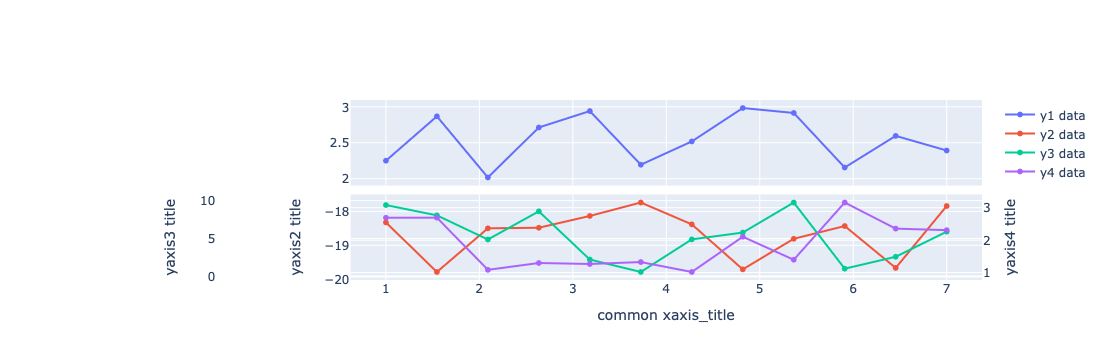

In [33]:
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.05, shared_xaxes=True)

# add trace sharing "xaxis" and defining differents "yaxis"
fig.add_trace(go.Scatter(
    x=np.linspace(1, 7, 12), y=2+np.random.rand(12),
        name='y1 data',
        yaxis='y1',
        xaxis='x1'), 
              row=1, col=1)

fig.add_trace(go.Scatter(
        x=np.linspace(1, 7, 12), y=-20+3*np.random.rand(12),
        name='y2 data',
        yaxis='y2',
        xaxis='x2'
         ))
fig.add_trace(go.Scatter(
        x=np.linspace(1, 7, 12), y=10.5*np.random.rand(12),
        name='y3 data',
        yaxis='y3',
        xaxis='x2'
         ))
fig.add_trace(go.Scatter(
        x=np.linspace(1, 7, 12), y=1+2.3*np.random.rand(12),
        name='y4 data',
        yaxis='y4',
        xaxis='x2'
         ))

# overlaying the "yaxis" of the features that needs to be ovelap. THIS PART OF THE CODES IS SO MANUALLY
fig.update_layout(xaxis_domain= [0.3, 1], xaxis2_title='common xaxis_title',
                  xaxis2_domain=[0.3, 1],
                  
                  yaxis2=dict(title_text='yaxis2 title'), # the first axis
                  yaxis3=dict(anchor= 'free',
                              overlaying= 'y2',
                              side= 'left',
                              position= 0.15,
                              title_text='yaxis3 title'),
                  yaxis4=dict(anchor= 'x2',
                              overlaying= 'y2',
                              side ='right',
                              title_text='yaxis4 title'))

#### 13.2 Example with real data - manually
No cicles for to test the codes

In [34]:
list_features_principal

['s&p500', 'nazdaq100', 'downjones']

In [35]:
list_features_secondary

['nvidia', 'apple', 'tesla']

In [36]:
["gray", "green", "red"]

['gray', 'green', 'red']

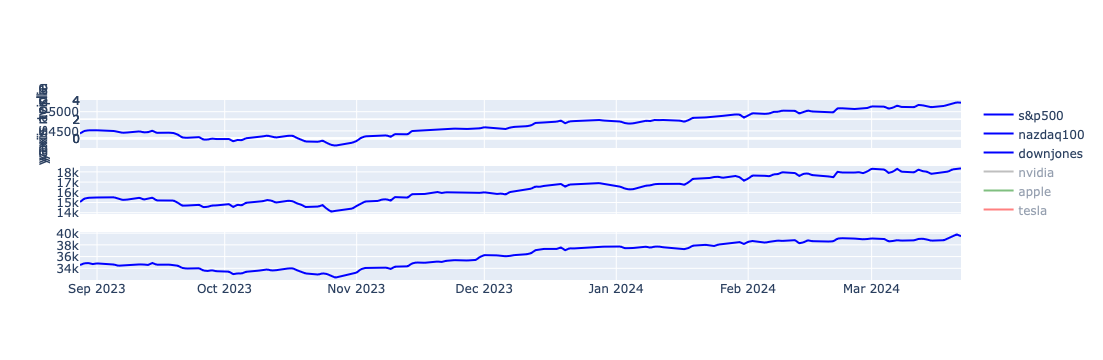

In [37]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)


###### plot primary features. It is important to not indicate the row and column of the subplot
# 's&p500'
aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['s&p500'],
    name = 's&p500',
    line = dict(color='blue'), # trends always the same color,
    xaxis = f'x1',
    yaxis = f'y1'
)
fig.add_trace(aux_plot_trend_feature_principal)

# 'nazdaq100'
aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['nazdaq100'],
    name = 'nazdaq100',
    line = dict(color='blue'), # trends always the same color,
    xaxis = f'x2',
    yaxis = f'y2'
)
fig.add_trace(aux_plot_trend_feature_principal)

# 'downjones'
aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['downjones'],
    name = 'downjones',
    line = dict(color='blue'), # trends always the same color,
    xaxis = f'x3',
    yaxis = f'y3'
)
fig.add_trace(aux_plot_trend_feature_principal)



###### plot secondary features. It is important to not indicate the row and column of the subplots.
## important 1
# In this example the secondary feature there are all repeated for each primary feature.
# In this example there 3 primary feature, so each secondary feature need to be defined 3 times

## important 2
# It is necesary define secondary features sharing "xaxis" and with a new "yaxis". (the the new yaxis is defining as overlaping the yaxis of principal features)


# secondary for 's&p500'
aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['nvidia'],
    name = 'nvidia',
    line = dict(color='gray'),
    xaxis = f'x1',
    yaxis = f'y4',
    visible='legendonly' 
)
fig.add_trace(aux_plot_trend_feature_principal)

aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['apple'],
    name = 'apple',
    line = dict(color='green'),
    xaxis = f'x1',
    yaxis = f'y5',
    visible='legendonly'
)
fig.add_trace(aux_plot_trend_feature_principal)

aux_plot_trend_feature_principal = go.Scatter(
    x = df.index,
    y = df['tesla'],
    name = 'tesla',
    line = dict(color='red'),
    xaxis = f'x1',
    yaxis = f'y6',
    visible='legendonly' 
)
fig.add_trace(aux_plot_trend_feature_principal)


# secondary for 'nazdaq100'
# todo



# secondary for 'downjones'
# todo



###### overlap "yaxis" of secondary features with "yaxis" of a primary feature
fig.update_layout(
                  yaxis4=dict(anchor= 'free',
                              overlaying= 'y1',
                              title_text='yaxis nvidia'
                             ),
                  yaxis5=dict(anchor= 'free',
                              overlaying= 'y1',
                              title_text='yaxis apple'
                             ),
                  yaxis6=dict(anchor= 'free',
                              overlaying= 'y1',
                              title_text='yaxis tesla'
                             ),
                             )

#### 13.3 Example with real data - try to find a way to do this automatically
The most dificult part to do automatically is the last part of the code fig.update_layout

To have the tracking of the "yaxis" the following formula is used to define:
- principal yaxis = index feature. For example: y1, y2, y3
- secondary yaxis = (len_principal_axis * index_principal) + index_secondary

In [38]:
####### Figure with subplots and sharex axis and specs to accept secondary y axis
# calculate number of rows
number_features_principal = len(list_features_principal)

# figure
fig = make_subplots(rows = number_features_principal, 
                    cols = 1, 
                    shared_xaxes = True, 
                    subplot_titles = tuple(list_features_principal)
                   )

####### iter across each principal feature and plot it in a subplot and in the same subplot plot all the secondary features
for index_principal, feature_principal in enumerate(list_features_principal, start=1):

    # add trend of the pricipal feature "i" in the row "index_i" 
    aux_plot_trend_feature_principal = go.Scatter(
        x=df.index,
        y=df[feature_principal],
        name=feature_principal,
        line=dict(color='blue'), # trends always the same color,
        xaxis = f'x{index_principal}',
        yaxis = f'y{index_principal}'
    )
    fig.add_trace(aux_plot_trend_feature_principal)

    # add trend of the secondary features in EACH PLOT of EACH PRINCIPAL FEATURE
    list_map_color = ["gray", "green", "red"] ## hardocoded map of colors each secondary feature
    for index_secondary, feature_secondary in enumerate(list_features_secondary, start=1):
        aux_plot_trend_secondary_feature = go.Scatter(
            x=df.index,
            y=df[feature_secondary],
            name=feature_secondary,
            line=dict(color = list_map_color[index_secondary-1]),
            visible='legendonly',  # init hidden,
            xaxis = f'x{index_principal}', # share "x axis" of primary feature
            # define new "y axis" with the formula: (len_principal_axis * index_principal) + index_secondary
            yaxis = f'y{(number_features_principal * index_principal) + index_secondary}', 
        )
        fig.add_trace(aux_plot_trend_secondary_feature)


###### overlap "yaxis" of secondary features with "yaxis" of a principal feature
# define layout configuration acording the formula: (len_principal_axis * index_principal) + index_secondary. automatically
layout_config = {
    f"yaxis{(number_features_principal * index_principal) + index_secondary}": dict(
        anchor = 'free',
        overlaying = f'y{index_principal}',
        title_text = f"yaxis {feature_secondary}"
    )
    for index_principal, feature_principal in enumerate(list_features_principal, start=1)
        for index_secondary, feature_secondary in enumerate(list_features_secondary, start=1)
}

# update layout
fig = fig.update_layout(**layout_config)

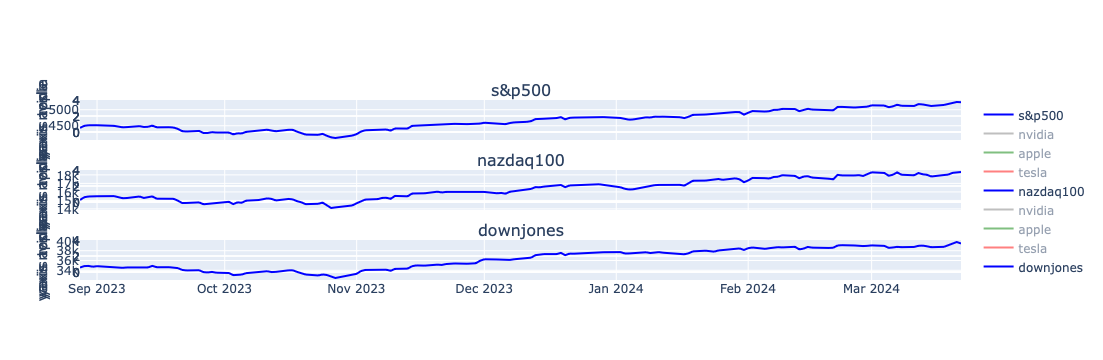

In [39]:
fig

### 14. Join previous plot with the features development previouly:
- button to activate or deactivate plots of secondary features across al subplots. with the adition to plots 2 or more **(now we have each secondary plot with its own axis)**
- more graduation in y axis
- show xaxis values across all subplots

In [40]:
####### Figure with subplots and sharex axis and specs to accept secondary y axis
# calculate number of rows
number_features_principal = len(list_features_principal)

# figure
fig = make_subplots(rows = number_features_principal, 
                    cols = 1, 
                    shared_xaxes = True, 
                    subplot_titles = tuple(list_features_principal)
                   )

####### iter across each principal feature and plot it in a subplot and in the same subplot plot all the secondary features
for index_principal, feature_principal in enumerate(list_features_principal, start=1):

    # add trend of the pricipal feature "i" in the row "index_i" 
    aux_plot_trend_feature_principal = go.Scatter(
        x=df.index,
        y=df[feature_principal],
        name=feature_principal,
        line=dict(color='blue'), # trends always the same color,
        xaxis = f'x{index_principal}',
        yaxis = f'y{index_principal}'
    )
    fig.add_trace(aux_plot_trend_feature_principal)

    # add trend of the secondary features in EACH PLOT of EACH PRINCIPAL FEATURE
    list_map_color = ["gray", "green", "red"] ## hardocoded map of colors each secondary feature
    for index_secondary, feature_secondary in enumerate(list_features_secondary, start=1):
        aux_plot_trend_secondary_feature = go.Scatter(
            x=df.index,
            y=df[feature_secondary],
            name=feature_secondary,
            line=dict(color = list_map_color[index_secondary-1]),
            visible='legendonly',  # init hidden,
            xaxis = f'x{index_principal}', # share "x axis" of primary feature
            # define new "y axis" with the formula: (len_principal_axis * index_principal) + index_secondary
            yaxis = f'y{(number_features_principal * index_principal) + index_secondary}', 
        )
        fig.add_trace(aux_plot_trend_secondary_feature)


###### overlap "yaxis" of secondary features with "yaxis" of a principal feature
# define "yaxis" of principal features
layout_config_yaxis_principal = {
    f"yaxis{index_principal}": dict(
        title_text = f"yaxis {feature_principal}"
    )
    for index_principal, feature_principal in enumerate(list_features_principal, start=1)
}

# define "yaxis" of secondary features acording the formula: (len_principal_axis * index_principal) + index_secondary. automatically
layout_config_yaxis_secondary = {
    f"yaxis{(number_features_principal * index_principal) + index_secondary}": dict(
        anchor = 'free',
        overlaying = f'y{index_principal}',
        title_text = f"yaxis {feature_secondary}",
        autoshift=True, title_standoff=0
    )
    for index_principal, feature_principal in enumerate(list_features_principal, start=1)
        for index_secondary, feature_secondary in enumerate(list_features_secondary, start=1)
}

# join "yaxis" configuration for principal and secondary features    
layout_config_yaxis = {}
layout_config_yaxis.update(layout_config_yaxis_principal)
layout_config_yaxis.update(layout_config_yaxis_secondary)

# update layout
fig = fig.update_layout(**layout_config_yaxis)


###### define buttons and actions to change the plot of secondary features
###### NOTE IT IS VERY HARCODED ACCORING THE FEATURES TO PLOT

# Create buttons to control the visibility of the trend of secondary features
# order visibility:  [primary_feature, secondary_feature_1, secondary_feature_2, secondary_feature_3]. 
# In this example: ['primary_feature', 'nvidia', 'apple', 'tesla']
only_trend_button = dict(label="Show only trend", method="update", args=[{"visible": [True, False, False, False]}])
nvidia_button = dict(label="Show nvidia", method="update", args=[{"visible": [True, True, False, False]}])
apple_button = dict(label="Show apple", method="update", args=[{"visible": [True, False, True, False]}])
tesla_button = dict(label="Show tesla", method="update", args=[{"visible": [True, False, False, True]}])
nvidia_apple_button = dict(label="Show nvidia apple", method="update", args=[{"visible": [True, True, True, False]}])
nvidia_tesla_button = dict(label="Show nvidia tesla", method="update", args=[{"visible": [True, True, False, True]}])
apple_tesla_button = dict(label="Show apple tesla", method="update", args=[{"visible": [True, False, True, True]}])
nvidia_apple_tesla_button = dict(label="Show nvidia apple tesla", method="update", args=[{"visible": [True, True, True, True]}])


# Add the buttons to the legend
fig = fig.update_layout(
    updatemenus=[
        dict(
            buttons=[only_trend_button,  # only principal plot
                     nvidia_button, apple_button, tesla_button, # invividual secondary
                     nvidia_apple_button, nvidia_tesla_button, apple_tesla_button, # multiple secondary
                     nvidia_apple_tesla_button # all secondary
                    ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.5, # original y=1.15, 1.3
            yanchor="top"
        ),
    ]
)


###### change general layout
fig = fig.update_layout(
    #height = 550 * number_rows, # largo
    #width = 1850 * number_columns, # ancho
    title_text="Plots of Index and Stocks to Explaint that",
    title_x = 0.5, # centrar titulo
    title_font = dict(size = 28)
)

####### Increase maximium number of ticks in y-axis
fig = fig.update_yaxes(nticks=10)


####### Actualizar los ticks en el eje x para mostrarlos en cada subplot
#fig.update_layout(xaxis1_showticklabels=True, xaxis2_showticklabels=True, xaxis3_showticklabels = True)  # hardcoded

dict_xaxis = {}
for index in range(len(list_features_principal)):
    dict_xaxis[f'xaxis{index+1}_showticklabels'] = True
fig = fig.update_layout(dict_xaxis)

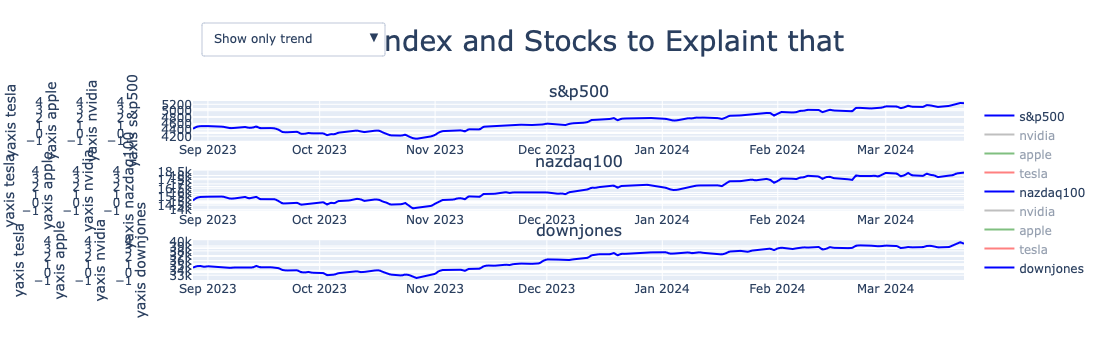

In [41]:
fig